# Loading Volume Data

#### Loading and viewing a sample volume dataset

LavaVu includes built in support for loading several types of volume data.

 - Raw floating point data, must provide dimensions or assumes 256^3
 - Image stacks as PNG or JPG files
 - Image stacks as multi-page TIFF
 - Image mosaics containing slices as tiles in a single JPG/PNG image

Of course, if the data format you use doesn't have built in support it is a simple matter to find a python library to load it and pass it directly to LavaVu via the numpy interface.

**Here we are using an example public domain data set downloaded from github**

https://raw.githubusercontent.com/OKaluza/sharevol/master/data.jpg

#### *Rotational C-arm x-ray scan of a human foot. Tissue and bone are present in the dataset, by Philips Research, Hamburg, Germany.* (Courtesy of http://volvis.org/)
    
This image contains 256x256x256 tiles, scaled 1:1:1 converted to a single 2d 4096x4096 jpeg image


**Download the source data**

LavaVu includes a function to download a file and save it unless it already exists

In [1]:
import lavavu
fn = 'foot_volume_mosaic.jpg'
source = 'https://raw.githubusercontent.com/OKaluza/sharevol/master/data.jpg'
lavavu.download(source, fn)

Downloading: foot_volume_mosaic.jpg


'foot_volume_mosaic.jpg'

**Create a viewer instance and load the volume**

In [1]:
lv = lavavu.Viewer()
vol = lv.file(fn, isovalue=0.5)

**Load a custom colour map**

In [1]:
cmap = """0.0000=rgba(0,0,0,0)
 0.0366=rgba(0,0,0,0)
 0.0469=rgba(18,15,0,1)
 0.0666=rgba(248,144,87,0.376471)
 0.1030=rgba(252,224,166,1)
 0.1460=rgba(255,81,0,1)
 0.2007=rgba(72,0,20,1)
 0.2361=rgba(246,245,122,1)
 0.3550=rgba(255,255,255,0)
 0.8941=rgba(255,255,255,0)
 1.0000=rgba(255,255,255,1)
 """
#Load this colourmap and apply to the loaded volume
vol.colourmap(cmap)

"""0.0000=rgba(0,0,0,0)
 0.0366=rgba(0,0,0,0)
 0.0469=rgba(18,15,0,1)
 0.0666=rgba(248,144,87,0.38)
 0.1030=rgba(252,224,166,1)
 0.1460=rgba(255,81,0,1)
 0.2007=rgba(72,0,20,1)
 0.2361=rgba(246,245,122,1)
 0.3550=rgba(255,255,255,0)
 0.8941=rgba(255,255,255,0)
 1.0000=rgba(255,255,255,1)
 """

In [1]:
#Add another colourmap, 
#this one is loaded on the Viewer object to make it available for selection but not active
cm = lv.colourmap(lavavu.cubehelix());
#To set transparency of air values, set the alpha channel of the first colour to zero
cm.colours[0][3] = 0.0

**Apply some viewer properties and initial view angle**

In [1]:
lv["border"] = False
lv.rotation(0,90,0)
lv.background(0.8)

**Create an interactive control panel**


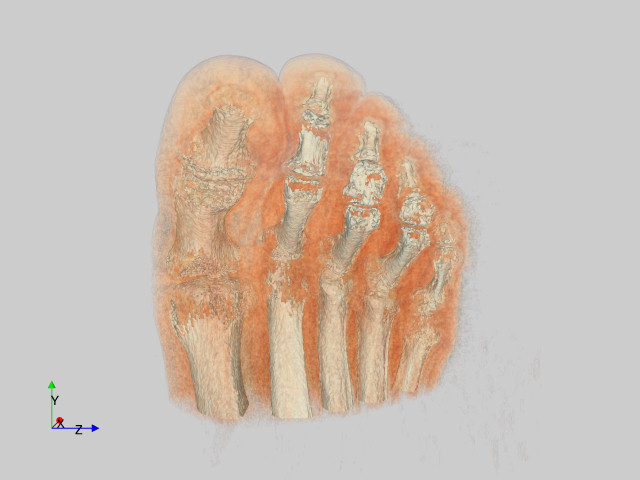

In [1]:
vol.control.ColourMaps()
lv.control.Panel()
vol.control('opacity')
vol.control('density')
vol.control('power')
vol.control('samples')
vol.control('isovalue')
vol.control('isoalpha')
vol.control('isosmooth')
vol.control('isowalls')
vol.control('bloom')
vol.control('densityclip')
vol.control('clipmin', label="Clip box min X,Y,Z")
vol.control('clipmax', label="Clip box max X,Y,Z")
lv.control('background')
lv.control.show()

**Get the camera state, this encapsulates the current view point and provides commands to restore it**

In [1]:
lv.camera()

lv.translation(0.0, 0.0, -1.732)
lv.rotation(180.0, 90.0, 180.0)


{'translate': [0.0, 0.0, -1.732],
 'rotate': [0.0, 0.707, 0.0, 0.707],
 'xyzrotate': [180.0, 90.0, 180.0],
 'fov': 45.0}

**Get the full visualisation state, this encapsulates all properties as a json object that can be saved and restored**

In [1]:
lv.save('state.json')

**Load a previously prepared state and update the viewer and controls**

In [1]:
lv.file('state.json')
lv.redisplay()      #Update the image
lv.control.update() #Update the control values

**Display a client side WebGL visualisation**


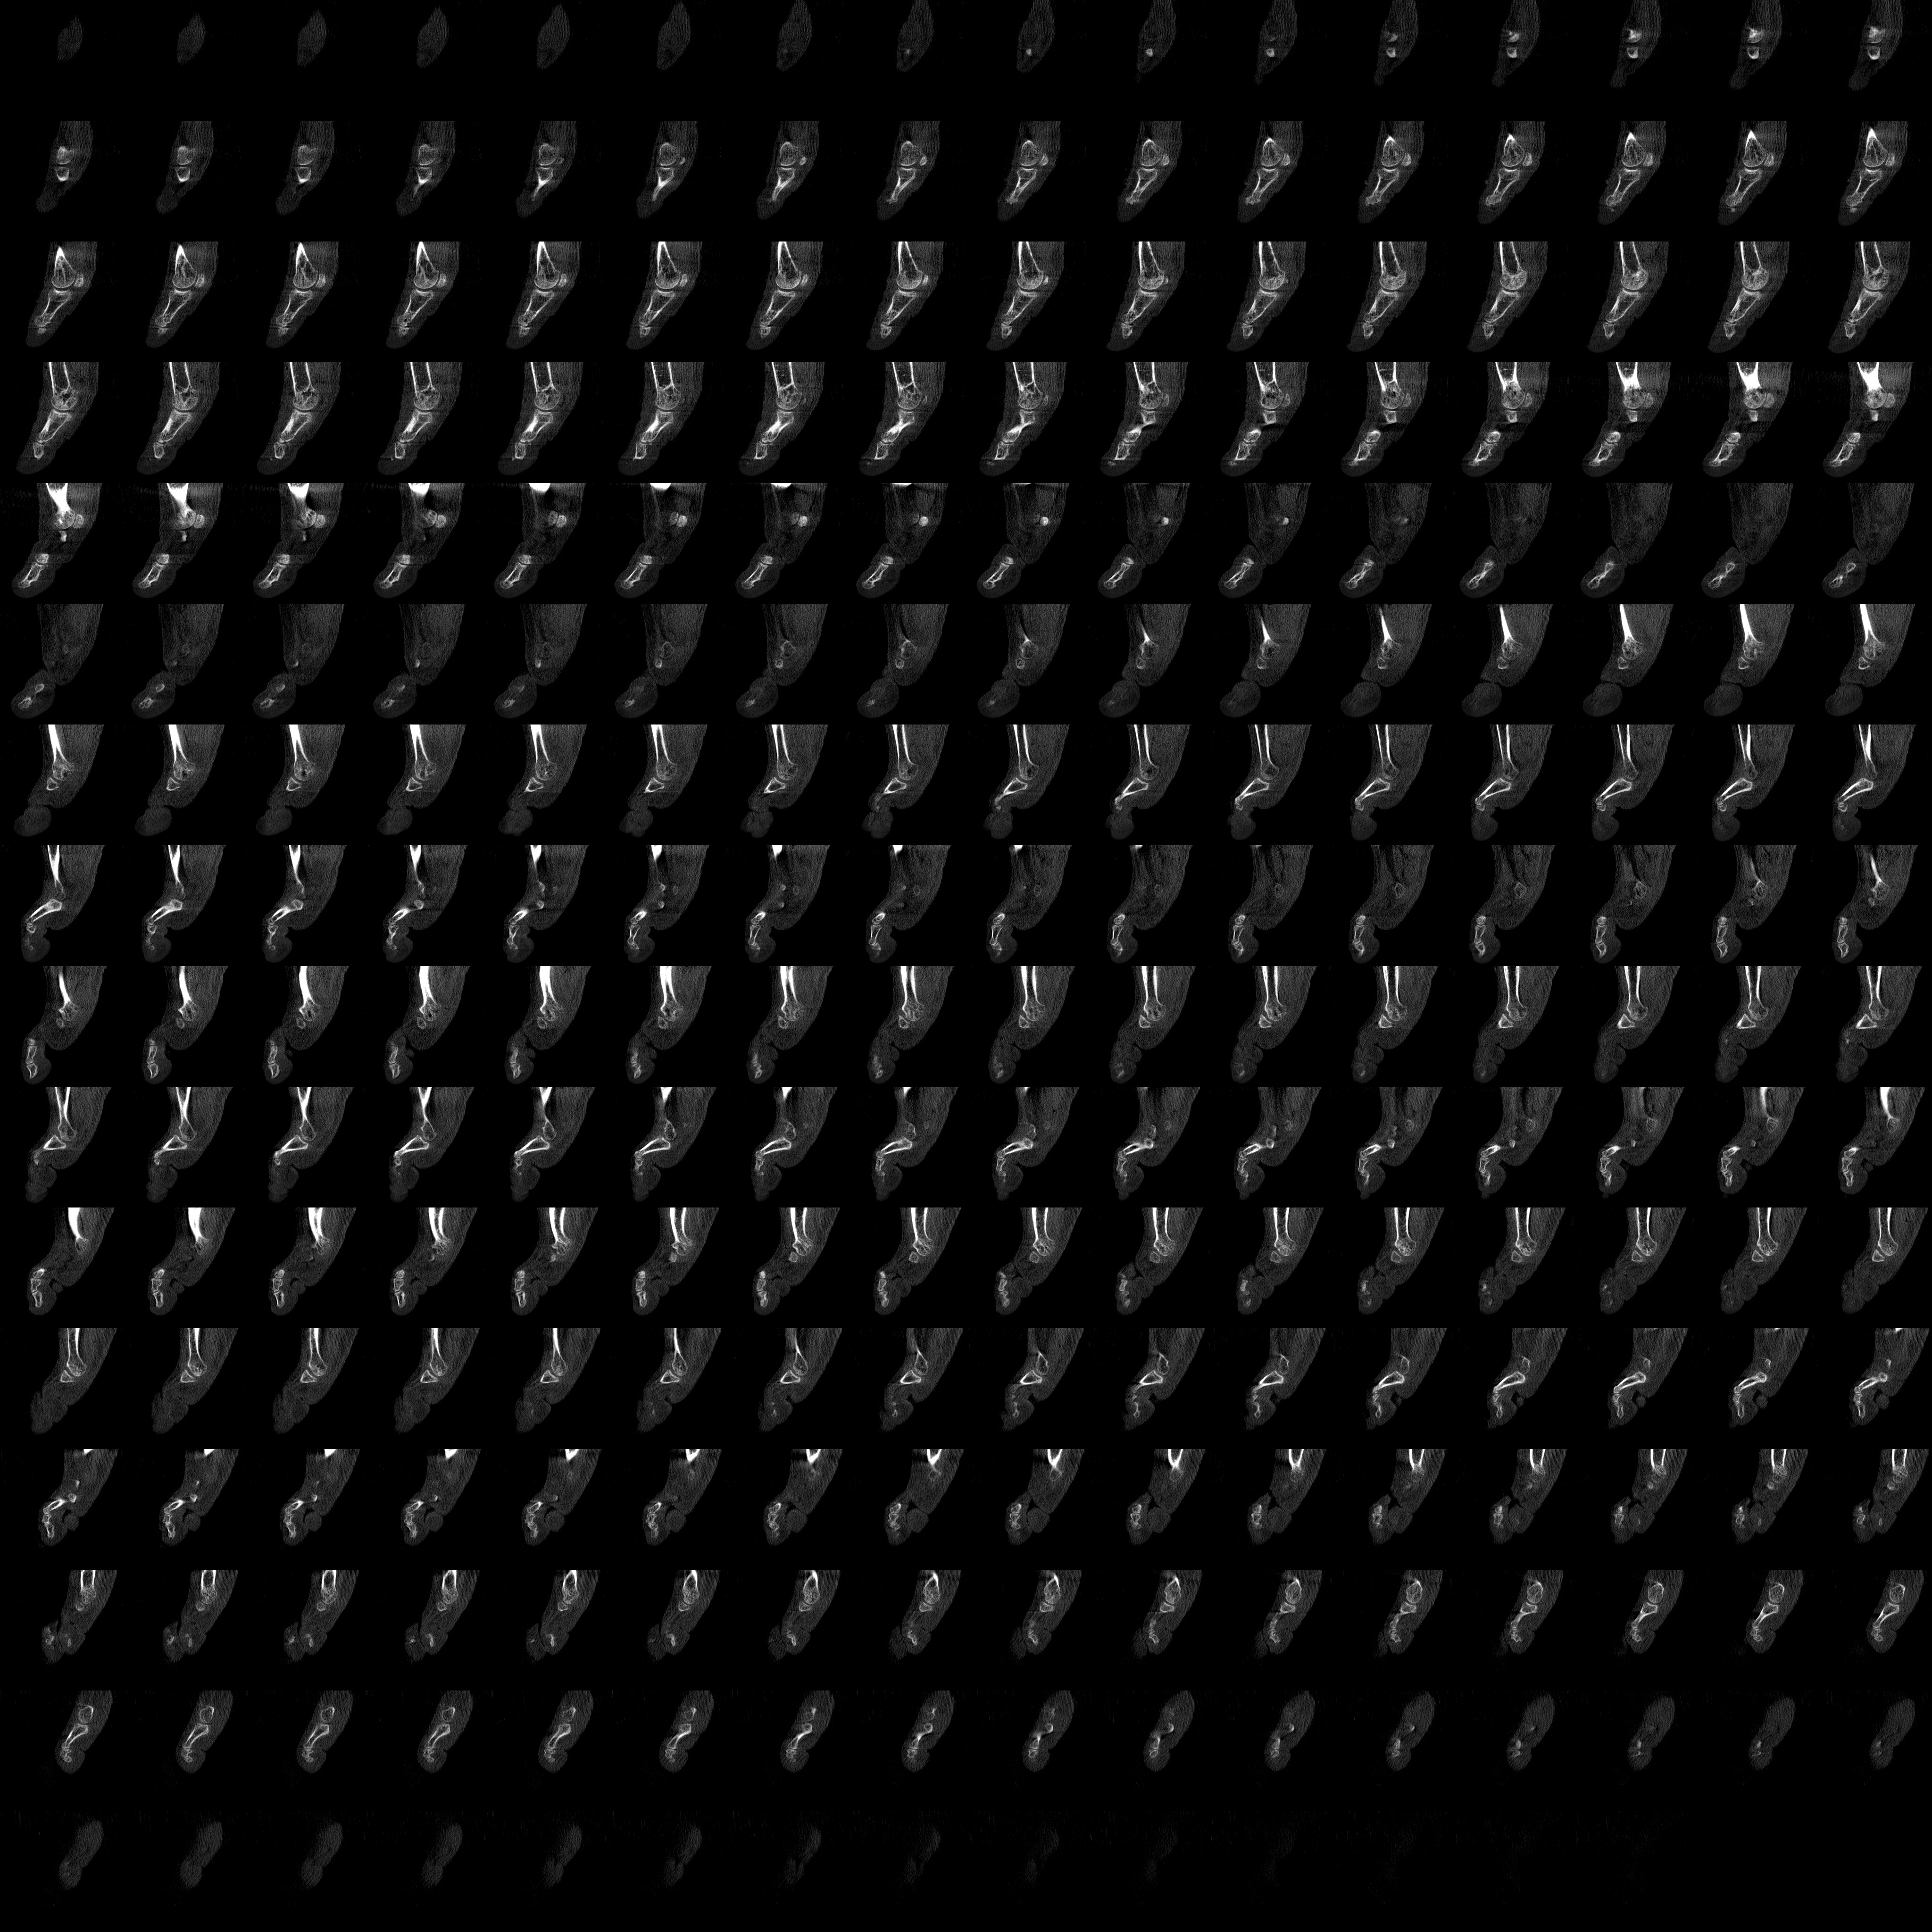

In [1]:
lv.webgl()